In [1]:
# importing libraries
import matplotlib.pyplot as plt
from glob import glob # to create a list of all the files in a directory
import cv2
import random 
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
%matplotlib inline 
# so there are no errors while plotting

from tensorflow.keras.preprocessing.image import ImageDataGenerator # Provides a way to augment your images
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau # To save weights intermediately,To decrease leraning rate
from tensorflow.keras.utils import plot_model


from IPython.display import SVG, Image
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.16.1


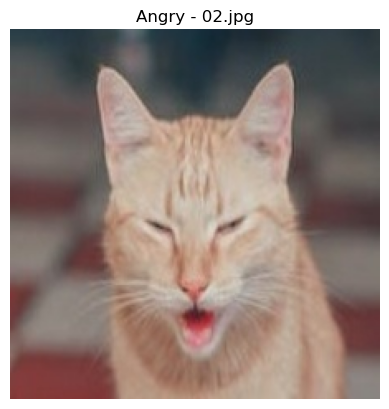

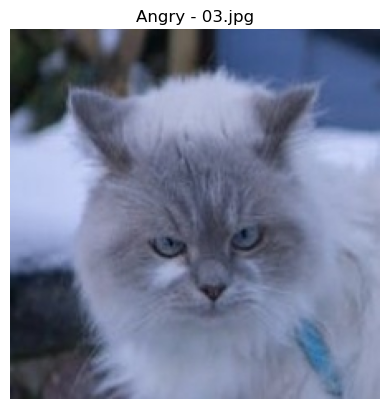

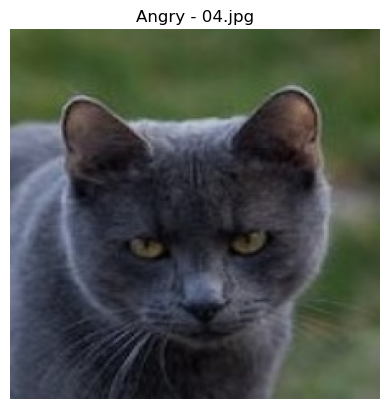

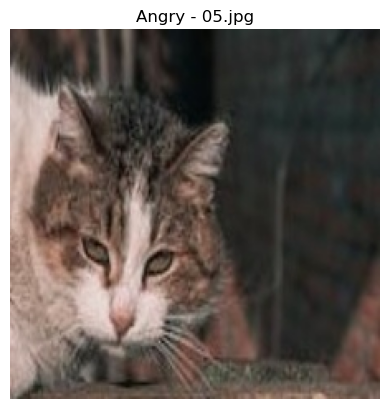

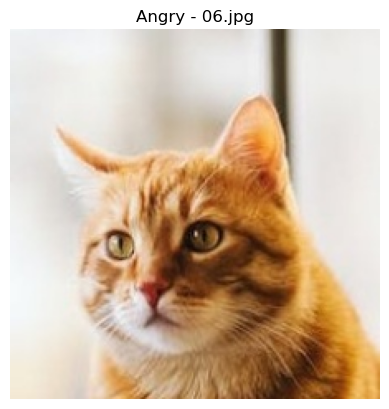

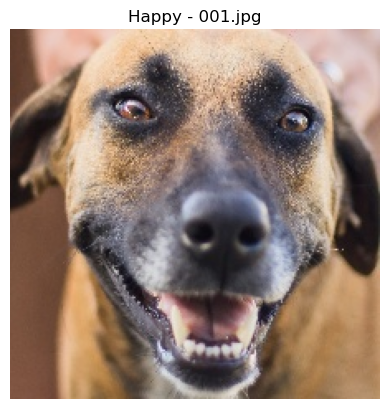

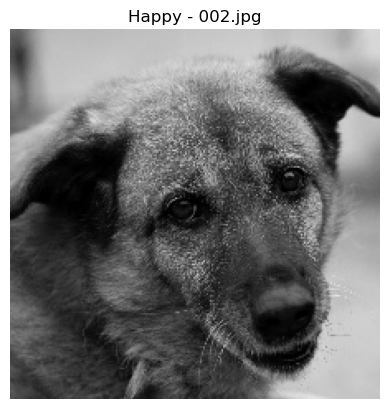

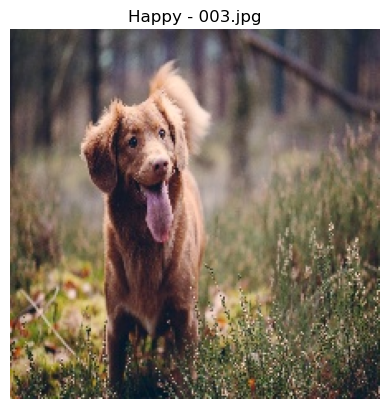

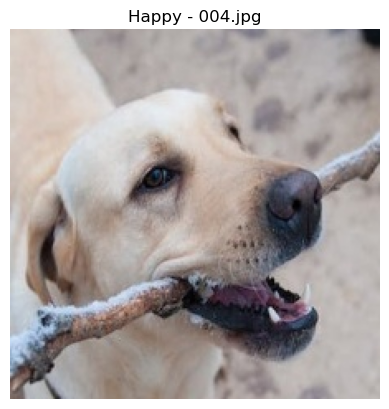

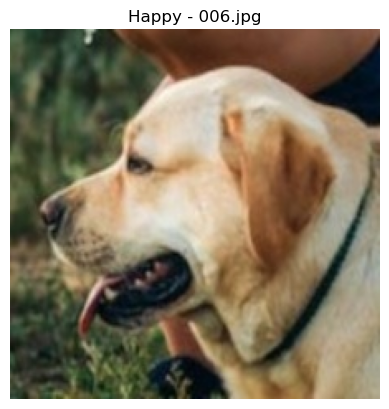

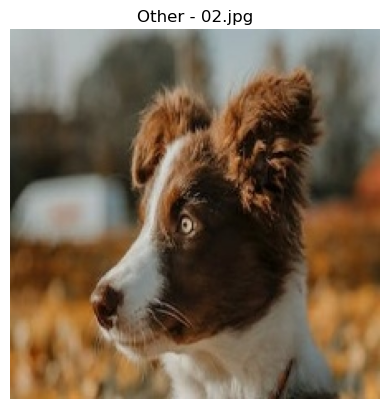

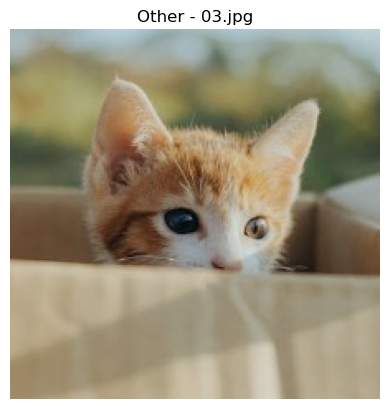

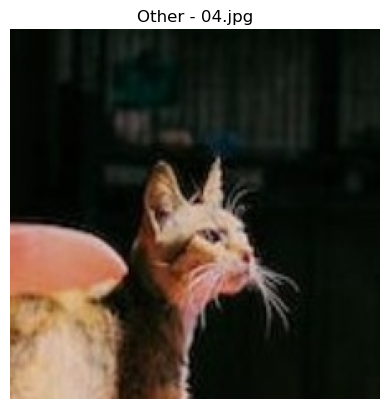

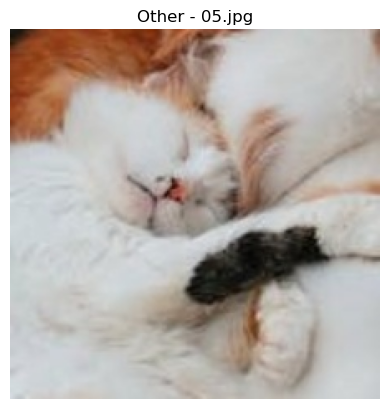

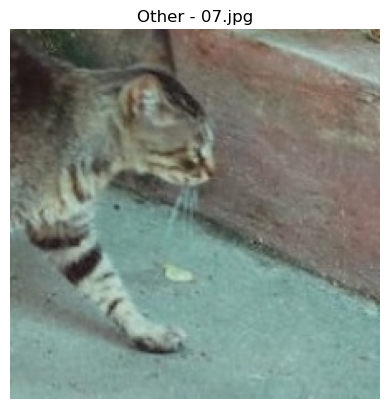

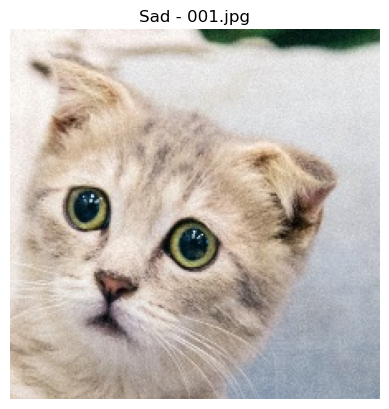

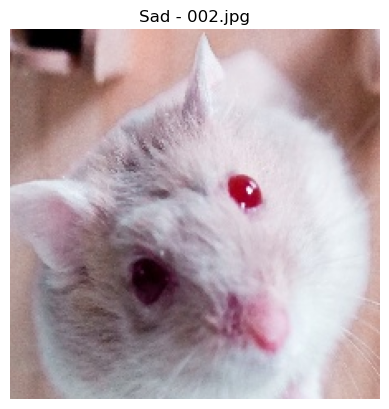

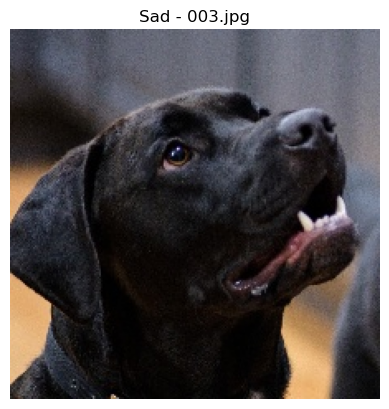

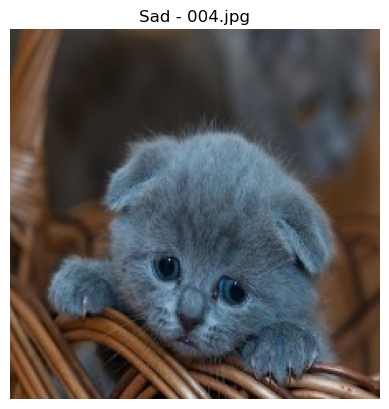

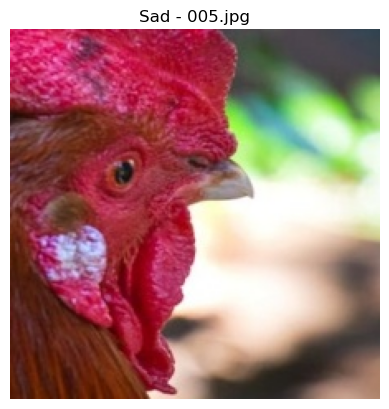

In [2]:
import os
import matplotlib.pyplot as plt
import cv2

# Define the path to the animal_emotion folder
base_folder = r'C:\Users\Vaibhav\OneDrive\Desktop\Nullclass_AnimalEmotion\animal_emotion'

# List of emotion categories
categories = ['angry', 'happy', 'other', 'sad']

# Loop through each category folder
for category in categories:
    category_folder = os.path.join(base_folder, category)
    
    # Check if the category folder exists
    if not os.path.exists(category_folder):
        print(f"The folder '{category_folder}' does not exist.")
    else:
        # Get list of image files in the category folder
        image_files = [f for f in os.listdir(category_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
        
        # Display images
        for image_file in image_files[:5]:  # Displaying first 5 images as an example
            image_path = os.path.join(category_folder, image_file)
            
            # Read image using OpenCV
            image = cv2.imread(image_path)
            
            # Check if the image was successfully read
            if image is None:
                print(f"Error reading image '{image_file}' in '{category_folder}'.")
            else:
                # Convert BGR to RGB (OpenCV uses BGR by default)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                
                # Display image using Matplotlib
                plt.imshow(image)
                plt.title(f'{category.capitalize()} - {image_file}')
                plt.axis('off')
                plt.show()


In [3]:
# Define the base folder path
base_folder = r'C:\Users\Vaibhav\OneDrive\Desktop\Nullclass_AnimalEmotion\animal_emotion'

# Define paths to the emotion categories
angry_folder = os.path.join(base_folder, 'angry')
happy_folder = os.path.join(base_folder, 'happy')
other_folder = os.path.join(base_folder, 'other')
sad_folder = os.path.join(base_folder, 'sad')


In [4]:
# Function to load and preprocess images
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (48, 48))  # Resize to a fixed size for the model
            images.append(img)
    return images

# Load images and labels for each emotion
angry_images = load_images_from_folder(angry_folder)
happy_images = load_images_from_folder(happy_folder)
sad_images = load_images_from_folder(sad_folder)

# Create labels for each emotion category
angry_labels = [0] * len(angry_images)
happy_labels = [1] * len(happy_images)
sad_labels = [2] * len(sad_images)

# Concatenate images and labels
X = np.array(angry_images + happy_images + sad_images)
y = np.array(angry_labels + happy_labels + sad_labels)

# Normalize pixel values to range [0, 1]
X = X.astype('float32') / 255.0

# One-hot encode the labels
y = to_categorical(y, 3)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Build the CNN model
model = Sequential()

model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 1), padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

print(model.summary())

# Compile the model with class weights
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])


C:\Users\Vaibhav\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 6, 6, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             

 Total params: 7,179,971 (27.39 MB)

 Trainable params: 7,178,051 (27.38 MB)

 Non-trainable params: 1,920 (7.50 KB)

None


In [6]:
# Calculate class weights
total_samples = len(y_train)
class_weights = {0: total_samples / np.sum(y_train[:, 0]), 
                 1: total_samples / np.sum(y_train[:, 1]), 
                 2: total_samples / np.sum(y_train[:, 2])}

# Train the model with class weights
history = model.fit(X_train.reshape(-1, 48, 48, 1), y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_split=0.1, 
                    class_weight=class_weights,
                    verbose=0)

# Evaluate the model on test data
loss, accuracy = model.evaluate(X_test.reshape(-1, 48, 48, 1), y_test)
losstr, accuracytr = model.evaluate(X_train.reshape(-1, 48, 48, 1), y_train)

# Save the trained model
model.save("facial_expression_model.h5")

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.2640 - loss: 1.1020
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 116ms/step - accuracy: 0.3347 - loss: 1.0981


In [7]:
print(f"Test accuracy: {accuracy*100:.2f}%")
print(f"Train accuracy: {accuracytr*100:.2f}%")

Test accuracy: 28.67%
Train accuracy: 34.50%
